# Deep Learning

<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Karl\AppData\Local\Temp\ipykernel_34600\2951398778.py:38: SyntaxWarning: invalid escape sequence '\d'
  df = load_data('..\data\Student_performance_data.csv')
c:\Users\Karl\source\repos\ApexCareSolutions\MLG382_Guided_Project_GroupX\src\preprocess_data.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0.0, True: 1.0})


Model: deep_learning
R2 Score: 0.9962
Mean Absolute Error: 0.09
Mean Squared Error: 0.01
deep_learning : Train accuracy Score: 0.9430
deep_learning : Test accuracy Score: 0.9962
--------------------------------------------------
Saved model to: ../artifacts\deep_learning_model.pkl


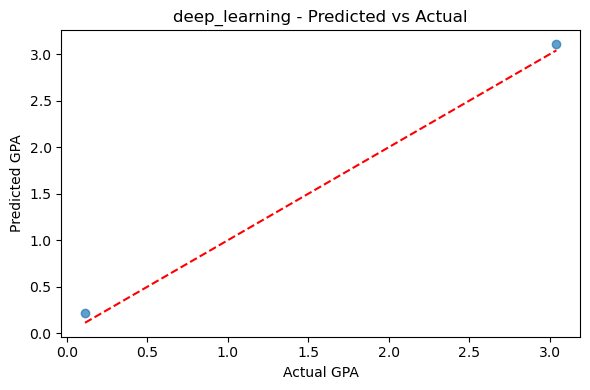

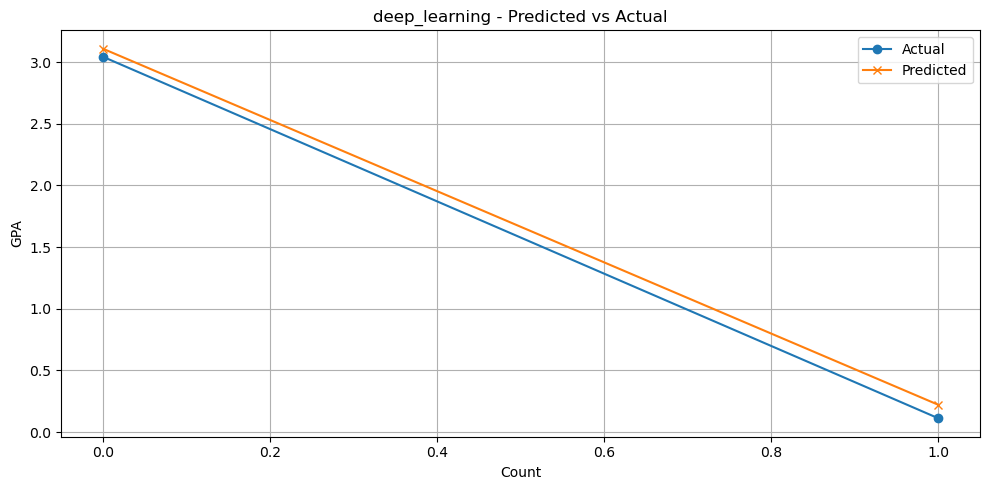

In [2]:
#Importing Required Libraries
import sys
import os

# Import the python libraies from source
#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))

#prepare_data.py file importing functions
from prepare_data import (
    load_data,
    catagorical_column_transformations,
    feature_engineering
    
)
#preprocess_data.py file importing functions
from preprocess_data import (
    scale_and_encode,
    remove_anomalies,
    get_numeric_columns,
    iterative_outlier_removal,
    make_Onehot
)
#train_models.py file importing functions
from train_models import (
    split_features_target,
    create_train_test_split,
    get_model,
    train_model
)


# Data preparation
# load the data using the load_data function from prepare_data.py
df = load_data('..\data\Student_performance_data.csv')
# decode the catagorical features
df = catagorical_column_transformations(df)
# perform feature engineering using the feature_engineering function from prepare_data.py
df = feature_engineering(df)
# Preprocessing
# scale and encode the data using the scale_and_encode function from preprocess_data.py
df = scale_and_encode(df)
#print(df.columns.to_list())
# remove anomalies using the remove_anomalies function from preprocess_data.py
#   df = remove_anomalies(df) ~ Removing the anaomalies might break the model

# get the numeric columns using the get_numeric_columns function from preprocess_data.py
numeric_columns = get_numeric_columns(df)
# iterative outlier removal using the iterative_outlier_removal function from preprocess_data.py
df = iterative_outlier_removal(df, numeric_columns)
# make the data one-hot
df = make_Onehot(df)
# Model preparation
X, y = split_features_target(df)
# create an train test plit
X_train, X_test, Y_train, Y_test = create_train_test_split(X, y)
# reloading and training the deeplearning model
model=get_model('deep_learning')
# model training and evaliation
train_model(model, 'deep_learning', X_train, X_test, Y_train, Y_test)